In [ ]:

import requests
import pandas as pd

# Tiingo API key
key = "5e5d08d156817da1de783637fe735a233734b7c8"

# Defineing the endpoint and parameters
ticker = "MSFT"  # Fetching data for Microsoft (MSFT)
url = f"https://api.tiingo.com/tiingo/daily/{ticker}/prices"
params = {
    'token': key,
    'startDate': '2015-01-01',
    'endDate': '2024-05-10'
}

# Makeing the request to Tiingo API
response = requests.get(url, params=params)

# Checking if the request was successful
if response.status_code == 200:
    data = response.json()
    # Convert data to DataFrame
    df = pd.DataFrame(data)
    # Save the DataFrame to a CSV file
    df.to_csv('MSFT.csv', index=False)
    print("Data saved to MSFT.csv")
else:
    print(f"Failed to fetch data: {response.status_code}")

Data saved to MSFT.csv


In [ ]:
import pandas as pd
df=pd.read_csv('MSFT.csv')



In [ ]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2015-01-02T00:00:00.000Z,46.760,47.4200,46.54,46.66,27913852,40.304641,40.873526,40.115012,40.218446,27913852,0.0,1.0
1,2015-01-05T00:00:00.000Z,46.325,46.7300,46.25,46.37,39673865,39.929694,40.278782,39.865048,39.968481,39673865,0.0,1.0
2,2015-01-06T00:00:00.000Z,45.650,46.7490,45.54,46.38,36447854,39.347880,40.295159,39.253065,39.977101,36447854,0.0,1.0
3,2015-01-07T00:00:00.000Z,46.230,46.4600,45.49,45.98,29114061,39.847809,40.046057,39.209968,39.632322,29114061,0.0,1.0
4,2015-01-08T00:00:00.000Z,47.590,47.7499,46.72,46.75,29645202,41.020057,41.157882,40.270163,40.296021,29645202,0.0,1.0


In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1

0        46.760
1        46.325
2        45.650
3        46.230
4        47.590
         ...   
2350    413.540
2351    409.340
2352    410.540
2353    412.320
2354    414.740
Name: close, Length: 2355, dtype: float64

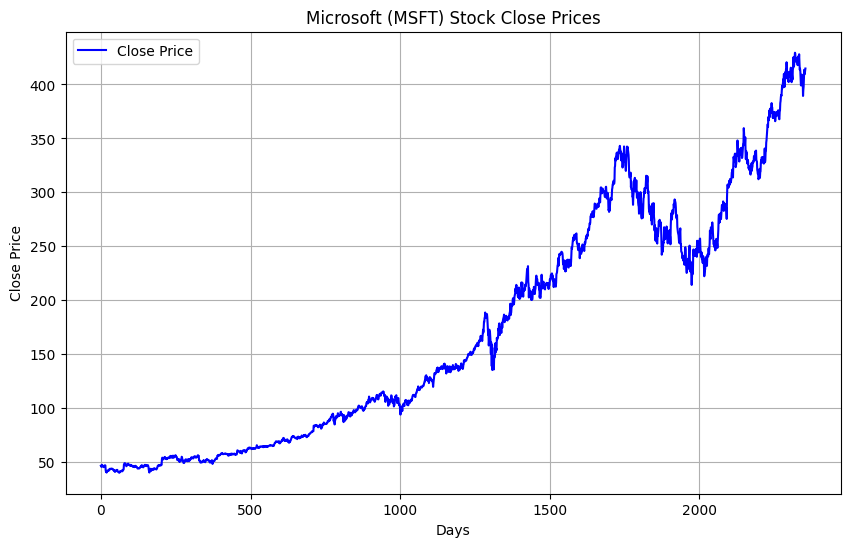

In [ ]:
import matplotlib.pyplot as plt

# Plotting the 'close' prices
plt.figure(figsize=(10, 6))
plt.plot(df1, color='blue', label='Close Price')
plt.title('Microsoft (MSFT) Stock Close Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
df1_scaled = scaler.fit_transform(np.array(df1).reshape(-1,1))

## Splitting dataset into train and test split
training_size = int(len(df1_scaled) * 0.7)
test_size = len(df1_scaled) - training_size
train_data, test_data = df1_scaled[0:training_size,:], df1_scaled[training_size:len(df1_scaled),:1]

# Function to create dataset with sliding window
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step):
        a = dataset[i:(i+time_step), 0]  # Features
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])  # Target variable
    return np.array(dataX), np.array(dataY)

# Define the time step
time_step = 100

# Create training and test sets with sliding window
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
print(X_test.shape), print(y_test.shape)

(607, 100, 1)
(607,)


(None, None)

In [ ]:

# Define the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

Epoch 1/100
25/25 [==============================] - 18s 326ms/step - loss: 0.0113 - val_loss: 0.0102
Epoch 2/100
25/25 [==============================] - 5s 183ms/step - loss: 6.6132e-04 - val_loss: 0.0036
Epoch 3/100
25/25 [==============================] - 6s 246ms/step - loss: 2.3104e-04 - val_loss: 0.0019
Epoch 4/100
25/25 [==============================] - 5s 183ms/step - loss: 2.0053e-04 - val_loss: 0.0020
Epoch 5/100
25/25 [==============================] - 5s 202ms/step - loss: 2.0956e-04 - val_loss: 0.0024
Epoch 6/100
25/25 [==============================] - 6s 231ms/step - loss: 2.0690e-04 - val_loss: 0.0019
Epoch 7/100
25/25 [==============================] - 6s 236ms/step - loss: 2.0710e-04 - val_loss: 0.0020
Epoch 8/100
25/25 [==============================] - 8s 316ms/step - loss: 1.9492e-04 - val_loss: 0.0020
Epoch 9/100
25/25 [==============================] - 5s 198ms/step - loss: 2.0688e-04 - val_loss: 0.0022
Epoch 10/100
25/25 [==============================] - 5s 1

In [ ]:
from sklearn.metrics import mean_squared_error
import math

# Predicting train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Reshape predictions to match expected shape
y_train_pred = y_train_pred.reshape(-1, 1)
y_test_pred = y_test_pred.reshape(-1, 1)

# Inverse transforming the scaled data to original scale
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred)

# Calculating RMSE for train and test data
train_rmse = math.sqrt(mean_squared_error(y_train_actual, y_train_pred))
test_rmse = math.sqrt(mean_squared_error(y_test_actual, y_test_pred))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

19/19 [==============================] - 1s 38ms/step
Train RMSE: 3.031443223736863
Test RMSE: 7.64880147800359


In [ ]:
y_test_pred

array([[331.0402 ],
       [335.1996 ],
       [338.50916],
       [337.69037],
       [335.6267 ],
       [331.48718],
       [326.72702],
       [322.05017],
       [320.32538],
       [322.54425],
       [327.11575],
       [333.6355 ],
       [339.51547],
       [343.4467 ],
       [344.48706],
       [342.70193],
       [339.26797],
       [334.45355],
       [327.04306],
       [319.12817],
       [313.15543],
       [310.1616 ],
       [309.97882],
       [312.29367],
       [312.63168],
       [312.36868],
       [310.45578],
       [308.06497],
       [305.76956],
       [302.9548 ],
       [300.46732],
       [297.20697],
       [295.81934],
       [296.94794],
       [301.26642],
       [307.29803],
       [312.3659 ],
       [316.3534 ],
       [316.09616],
       [313.8564 ],
       [310.13135],
       [307.14282],
       [306.96567],
       [306.83527],
       [304.71216],
       [301.5576 ],
       [299.82043],
       [299.48093],
       [298.17157],
       [295.62256],


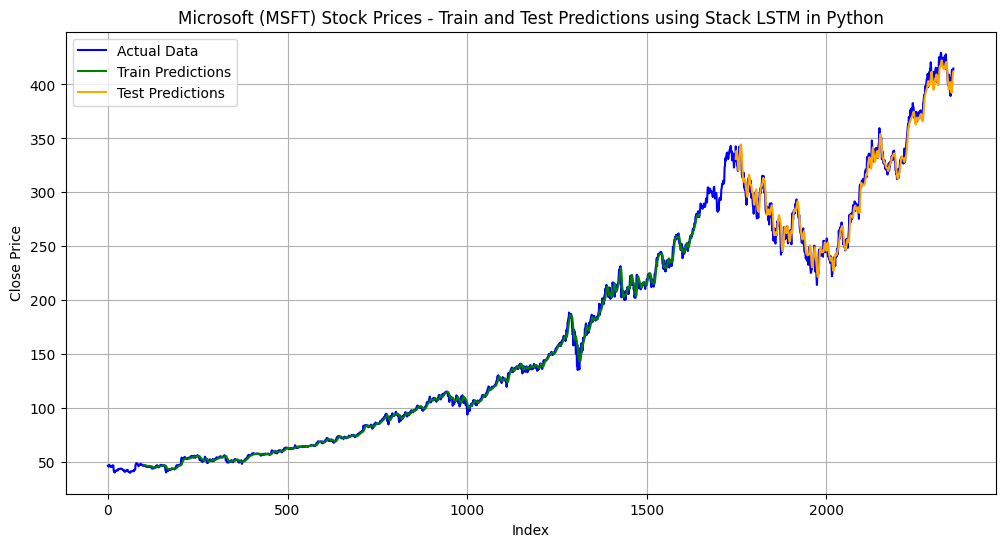

In [ ]:
# Ensure that df1_scaled is also inverse transformed to original scale
df1_original = scaler.inverse_transform(df1_scaled)

# Plotting train and test predictions along with actual data
plt.figure(figsize=(12, 6))

# Creating empty arrays for plotting train and test predictions
trainPredictPlot = np.empty_like(df1_original)
trainPredictPlot[:, :] = np.nan
testPredictPlot = np.empty_like(df1_original)
testPredictPlot[:, :] = np.nan

# Plotting train predictions
train_pred_index = np.arange(time_step, time_step + len(y_train_pred))
trainPredictPlot[train_pred_index] = y_train_pred

# Plotting test predictions
test_pred_index = np.arange(len(df1_original) - len(y_test_pred), len(df1_original))
testPredictPlot[test_pred_index] = y_test_pred

# Plotting actual data
plt.plot(df1_original, label='Actual Data', color='blue')

# Plotting train predictions
plt.plot(trainPredictPlot, label='Train Predictions', color='green')

# Plotting test predictions
plt.plot(testPredictPlot, label='Test Predictions', color='orange')

plt.title('Microsoft (MSFT) Stock Prices - Train and Test Predictions using Stack LSTM in Python')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Predicting future prices for the next 15 days
future_predictions = []
last_sequence = df1_scaled[-time_step:].reshape(1, time_step, 1)  # Start prediction from the last sequence of the data

for _ in range(15):
    future_prediction = model.predict(last_sequence)[0][0]
    future_predictions.append(future_prediction)
    last_sequence = np.append(last_sequence[:, 1:, :], np.array([[future_prediction]]).reshape(1, 1, 1), axis=1)  # Update the sequence for the next prediction

# Inverse transforming future predictions to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 [==============================] - 0s 32ms/step


In [ ]:
# Generate date range for future predictions
end_date = df['date'].iloc[-1]
future_dates = pd.date_range(start=end_date, periods=15 + 1, freq='B')[1:]
dates_list = [str(date) for date in future_dates]
dates_list

['2024-05-13 00:00:00+00:00',
 '2024-05-14 00:00:00+00:00',
 '2024-05-15 00:00:00+00:00',
 '2024-05-16 00:00:00+00:00',
 '2024-05-17 00:00:00+00:00',
 '2024-05-20 00:00:00+00:00',
 '2024-05-21 00:00:00+00:00',
 '2024-05-22 00:00:00+00:00',
 '2024-05-23 00:00:00+00:00',
 '2024-05-24 00:00:00+00:00',
 '2024-05-27 00:00:00+00:00',
 '2024-05-28 00:00:00+00:00',
 '2024-05-29 00:00:00+00:00',
 '2024-05-30 00:00:00+00:00',
 '2024-05-31 00:00:00+00:00']

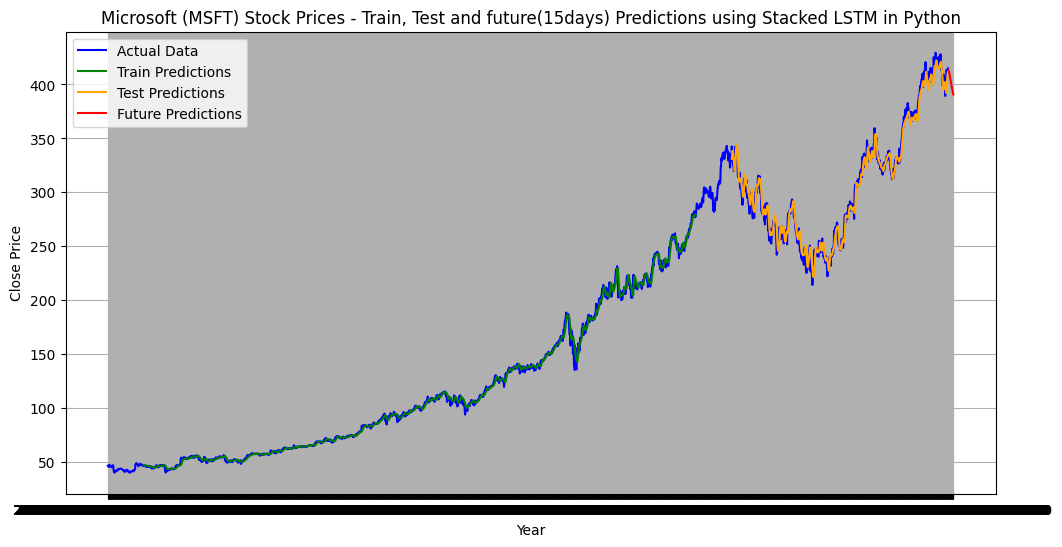

Future Predictions for the next 15 days:
Day 1: 412.87603759765625
Day 2: 412.5706481933594
Day 3: 411.50836181640625
Day 4: 409.9953918457031
Day 5: 408.21868896484375
Day 6: 406.2928161621094
Day 7: 404.29827880859375
Day 8: 402.29736328125
Day 9: 400.33837890625
Day 10: 398.4567565917969
Day 11: 396.677001953125
Day 12: 395.0133972167969
Day 13: 393.4733581542969
Day 14: 392.0587463378906
Day 15: 390.7677917480469


In [ ]:
# Generate date range for future predictions
# end_date = df['date'].iloc[-1]
# future_dates = pd.date_range(start=end_date, periods=15 + 1, freq='B')[1:]
# future_dates
# Plotting actual data
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df1_original, label='Actual Data', color='blue')

# Plotting train predictions
plt.plot(df['date'].iloc[train_pred_index], trainPredictPlot[train_pred_index], label='Train Predictions', color='green')

# Plotting test predictions
plt.plot(df['date'].iloc[test_pred_index], testPredictPlot[test_pred_index], label='Test Predictions', color='orange')

# Plotting future predictions
plt.plot(dates_list, future_predictions, label='Future Predictions', color='red')

plt.title('Microsoft (MSFT) Stock Prices - Train, Test and future(15days) Predictions using Stacked LSTM in Python')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Print future predictions
print("Future Predictions for the next 15 days:")
for i, pred in enumerate(future_predictions):
    print(f"Day {i + 1}: {pred[0]}")